In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
survey = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv")

In [3]:
survey.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


## Finding duplicates

In [4]:
survey.duplicated().sum()

154

In [5]:
survey.drop_duplicates(inplace=True)

In [6]:
survey.duplicated().sum()

0

## Finding Missing values

In [7]:
survey.isnull().sum()

Respondent        0
MainBranch        0
Hobbyist          0
OpenSourcer       0
OpenSource       81
               ... 
Sexuality       542
Ethnicity       675
Dependents      140
SurveyLength     19
SurveyEase       14
Length: 85, dtype: int64

In [8]:
survey.Ethnicity.isna().sum()

675

In [9]:
survey.WorkLoc.isna().sum()

32

In [10]:
survey.WorkLoc.value_counts()

WorkLoc
Office                                            6806
Home                                              3589
Other place, such as a coworking space or cafe     971
Name: count, dtype: int64

In [11]:
survey.WorkLoc.value_counts().max()

6806

In [14]:
survey.fillna({"WorkLoc":"Office"}, inplace=True)

## Normalizing data

There are two columns in the dataset that talk about compensation.

One is "CompFreq". This column shows how often a developer is paid (Yearly, Monthly, Weekly).

The other is "CompTotal". This column talks about how much the developer is paid per Year, Month, or Week depending upon his/her "CompFreq".

This makes it difficult to compare the total compensation of the developers.

In this section you will create a new column called 'NormalizedAnnualCompensation' which contains the 'Annual Compensation' irrespective of the 'CompFreq'.

Once this column is ready, it makes comparison of salaries easy.

In [17]:
survey.CompFreq.unique()

array(['Yearly', 'Monthly', 'Weekly', nan], dtype=object)

In [19]:
def Comp_conversion(row):
    if row['CompFreq'] == 'Yearly':
        return row['CompTotal']
    elif row['CompFreq'] == 'Monthly':
        return row['CompTotal'] * 12
    elif row['CompFreq'] == 'Weekly':
        return row['CompTotal'] * 52
    else:
        return None
survey["NormalizedAnnualCompensation"] = survey.apply(Comp_conversion, axis=1)

## Distribution

The column ConvertedComp contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.
This assumes 12 working months and 50 working weeks.

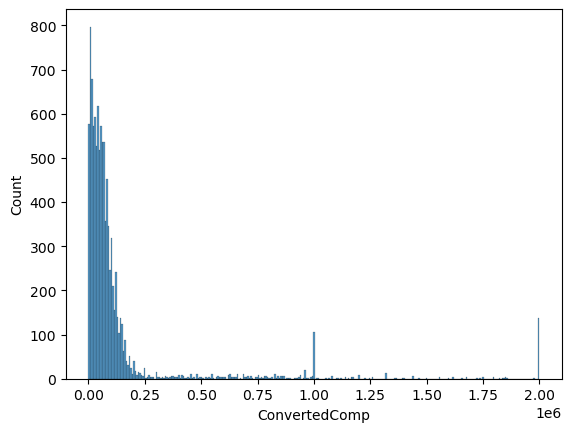

<Figure size 640x480 with 0 Axes>

In [25]:
sns.histplot(x="ConvertedComp", data=survey)
plt.show()
plt.clf()

In [28]:
survey.ConvertedComp.min()

0.0

#### What is the median of the column ConvertedComp?

In [29]:
survey.ConvertedComp.median()

57745.0

In [30]:
survey[survey["Gender"] == "Man"].Respondent.count()

10480

In [31]:
survey[survey["Gender"] == "Woman"].ConvertedComp.median()

57708.0

#### Give the five number summary for the column Age?

In [32]:
print(f"Minimum Age: {survey.Age.min()}")
print(f"Median Age: {survey.Age.median()}")
print(f"Maximum Age: {survey.Age.max()}")
print(f"Quartile 1: {survey.Age.quantile(0.25)}")
print(f"Quartile 3: {survey.Age.quantile(0.75)}")
print(f"IQR: {survey.Age.quantile(0.75) - survey.Age.quantile(0.25)}")

Minimum Age: 16.0
Median Age: 29.0
Maximum Age: 99.0
Quartile 1: 25.0
Quartile 3: 35.0
IQR: 10.0


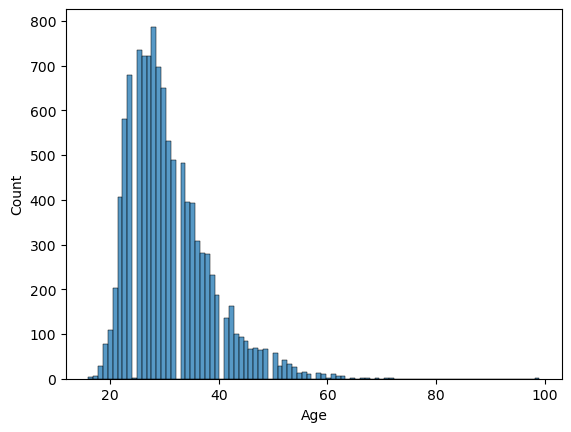

<Figure size 640x480 with 0 Axes>

In [33]:
sns.histplot(x="Age", data=survey)
plt.show()
plt.clf()

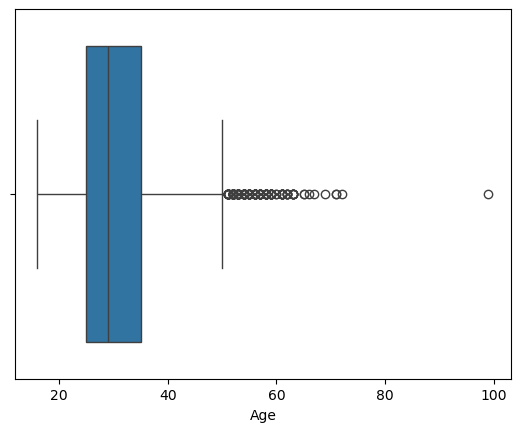

<Figure size 640x480 with 0 Axes>

In [35]:
sns.boxplot(x="Age", data=survey)
plt.show()
plt.clf()

### Finding outliers

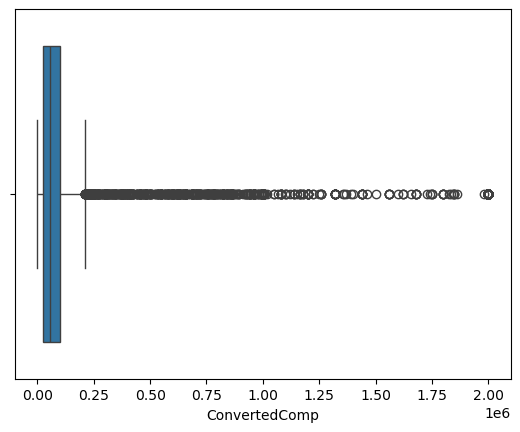

<Figure size 640x480 with 0 Axes>

In [37]:
sns.boxplot(x="ConvertedComp", data=survey)
plt.show()
plt.clf()

In [38]:
survey.ConvertedComp.quantile(0.75) - survey.ConvertedComp.quantile(0.25)

73132.0

In [41]:
# your code goes here
iqr = survey.ConvertedComp.quantile(0.75) - survey.ConvertedComp.quantile(0.25)
q1 = survey.ConvertedComp.quantile(0.25)
q3 = survey.ConvertedComp.quantile(0.75)
## 1.5 is a commonly used constant multiplier to identify potential outliers.
## The value 1.5 is somewhat arbitrary but is based on the idea that values more than 1.5 times the IQR 
## above the third quartile (Q3) or below the first quartile (Q1) are considered potential outliers.
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(lower_bound)
print(upper_bound)

-82830.0
209698.0


In [42]:
survey[(survey["ConvertedComp"] < lower_bound) | (survey["ConvertedComp"] > upper_bound)].ConvertedComp.count()

879

In [43]:
survey_no_outliers = survey[(survey["ConvertedComp"] >= lower_bound) & (survey["ConvertedComp"] <= upper_bound)]

In [44]:
survey_no_outliers.ConvertedComp.std()

43394.336754713266

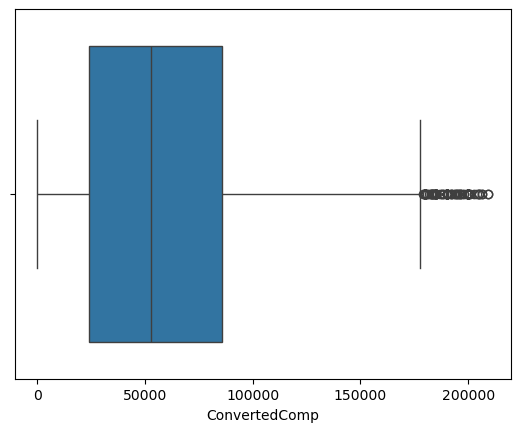

<Figure size 640x480 with 0 Axes>

In [45]:
sns.boxplot(x="ConvertedComp", data=survey_no_outliers)
plt.show()
plt.clf()

### Finding correlation

#### Find the correlation between Age and all other numerical columns

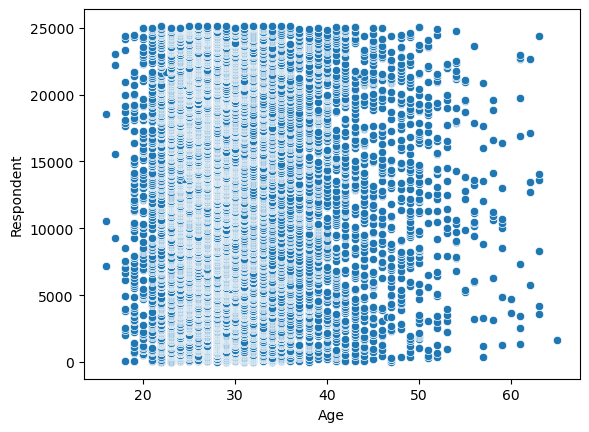

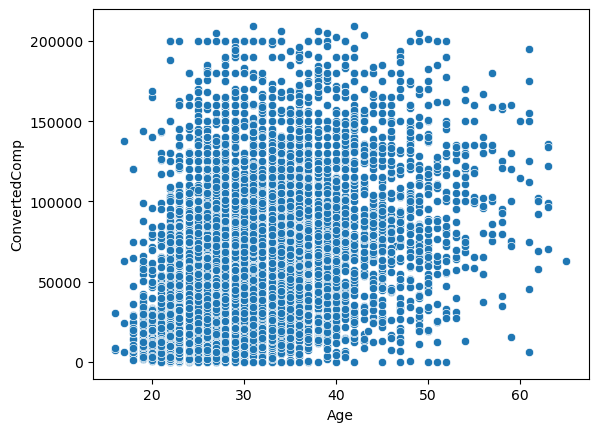

<Figure size 640x480 with 0 Axes>

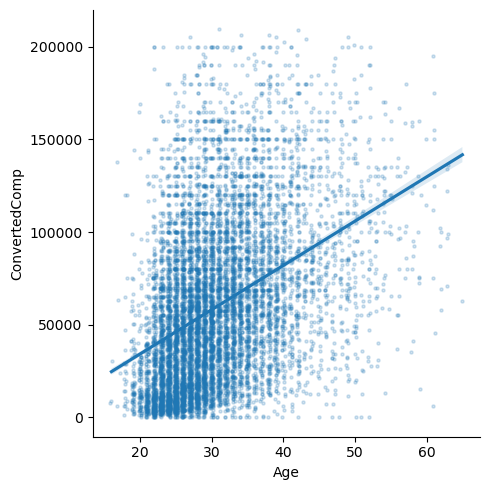

<Figure size 640x480 with 0 Axes>

In [55]:
survey_age = survey_no_outliers[survey_no_outliers["Age"] <= 65]

sns.scatterplot(x="Age", y="Respondent", data=survey_age)
plt.show()
plt.clf()

sns.scatterplot(x="Age", y="ConvertedComp", data=survey_age)
plt.show()
plt.clf()

sns.lmplot(x = 'Age', y = 'ConvertedComp', data = survey_age, x_jitter = 0.25, scatter_kws={"s": 5, "alpha":0.2}, fit_reg=True)
plt.show()
plt.clf()